#** INM 702 - Task 1**
# Nabeel Shaikh
# 210006323 - nabeel.shaikh@city.ac.uk

In [36]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

class BuildGrid():
  #generating grid with random numbers
  def grid(self):
    #specifying limits for height and width of the grid
    h = np.random.randint(5,12)
    w = np.random.randint(5,12)
    #generating random cost for each cell between 1 and 12
    data = np.random.randint(1,12,size=(h,w))
    print("Grid: \n",data)
    return data

  def showgrid(self,g):
    print("\n")
    print("Visualizing the Grid:")
    print("\n")
    #visualizing the grid
    ax = sns.heatmap(g, annot=True, fmt="d", cbar = None, cmap=plt.cm.Blues)
    plt.show()

  def shortpath(self,g):
    #implementing game mode 1
    row = len(g) - 1
    col = len(g[0]) - 1
    #print(row)
    #print(col)
    i = j = cost = 0
    path1 = []
    path1.append((i,j))
    condition = True
    while(condition):
      if (i==row and j==col):
        condition = False
      else:
        if i < row:
          d = g[i+1][j]
        else: 
          d = 20     #any value greater than h & w to avoid Index out of bound error
        if j < col:
          r = g[i][j+1]
        else: 
          r = 20     #any value greater than h & w to avoid Index out of bound error
        if d < r:
          i = i + 1
          #print(i)
        else:
          j = j + 1
          #print(j)
        path1.append((i,j))
        cost = cost + g[i][j]
    print('*Heuristic Game Mode 1*')
    print("-------------------------------------------------------------------- \n")
    print("The path travelled is: ",path1)
    print('\n')
    h1 = cost
    print("The cost of shortest path is: ", cost )
    print('\n')

    plt.title('Game Mode 1')
    ax = sns.heatmap(g, annot=True, fmt="d", cbar = None, cmap=plt.cm.Blues)
    x,y = zip(*path1)
    plt.plot(y,x)
    plt.scatter(y,x, color = "red")
    plt.xticks(np.arange(len(g[0])))
    plt.show()

    #implementing game mode 2
    i = j = cost = 0
    path2 = []
    path2.append((i,j))
    condition = True
    while(condition):
      if (i==row and j==col):
        condition = False
      else:
        if i < row:
          d = abs(g[i][j] - g[i+1][j])
        else: 
          d = 20     #any value greater than h & w to avoid Index out of bound error
        if j < col:
          r = abs(g[i][j] - g[i][j+1])
        else: 
          r = 20     #any value greater than h & w to avoid Index out of bound error
        if d < r:
          i = i + 1
        else:
          j = j + 1
        path2.append((i,j))
        cost = cost + g[i][j]
    print("\n --------------------------------------------------------------------")
    print('*Heuristic Game Mode 2*')
    print("-------------------------------------------------------------------- \n")
    print("The path travelled is: ",path2)
    print('\n')
    h2 = cost
    print("The cost of shortest path is: ", cost )
    print('\n')

    plt.title('Game Mode 2')
    ax = sns.heatmap(g, annot=True, fmt="d", cbar = None, cmap=plt.cm.Blues)
    x,y = zip(*path2)
    plt.plot(y,x)
    plt.scatter(y,x, color = "red")
    plt.xticks(np.arange(len(g[0])))
    plt.show()

In [37]:
class Dijkstra():
  def dijmode1(self, g):
    grid = g
    h = len(g)    # height of grid
    w = len(g[0])   #width of grid
    print("--------------------------------------------------------------------")
    print('*Dijkstra Game Mode 1*')
    print("-------------------------------------------------------------------- \n")
    print("Height of grid=",h)
    print("Width of grid=",w)
    print("\n")
    #print("Grid: \n",grid) 
    #print(buildgrid.showgrid(g))
    print("\n")


    dist = np.ones((h,w),dtype=int)*np.Infinity
    dist[0,0]=0
    lastloc = np.ones((h,w),dtype=int)*np.nan
    visit = np.zeros((h,w),dtype=bool)
    flag = True
    i,j = np.int(0),np.int(0)

    while flag:
      if i < h-1:     # going up
        if dist[i+1,j] > dist[i,j] + grid[i+1,j] and not visit[i+1,j]:
          dist[i+1,j] = dist[i,j] + grid[i+1,j] 
          lastloc[i+1,j] = np.ravel_multi_index([i,j],(h,w))

      if i > 0:     # going down
        if dist[i-1,j] > dist[i,j] + grid[i-1,j] and not visit[i-1,j]:
          dist[i-1,j] = dist[i,j] + grid[i-1,j] 
          lastloc[i-1,j] = np.ravel_multi_index([i,j],(h,w))

      if j < w-1:     # going right
        if dist[i,j+1] > dist[i,j] + grid[i,j+1] and not visit[i,j+1]:
          dist[i,j+1] = dist[i,j] + grid[i,j+1]
          lastloc[i,j+1] = np.ravel_multi_index([i,j],(h,w))

      if j>0:     # going left
        if dist[i,j-1] > dist[i,j] + grid[i,j-1] and not visit[i,j-1]:
          dist[i,j-1] = dist[i,j] + grid[i,j-1] 
          lastloc[i,j-1] = np.ravel_multi_index([i,j],(h,w))

      visit[i,j] = True
      disttemp = dist
      disttemp[np.where(visit)] = np.Infinity

      # calculate shortest path
      min = np.unravel_index(np.argmin(disttemp),np.shape(disttemp))
      i,j = min[0],min[1]
      if i == h-1 and j == w-1:
        flag = False

    # backtrack path
    temp = grid.astype(float)
    i,j = h-1, w-1
    path = []
    path1 = []
    temp[np.int(i),np.int(j)] = np.nan

    while i > 0.0 or j > 0.0:
      path.append([np.int(i),np.int(j)])
      ll = np.unravel_index(np.int(lastloc[np.int(i),np.int(j)]), (h,w))
      path1.append(ll)
      i,j = ll[0],ll[1]
      temp[np.int(i),np.int(j)] = np.nan
      print(temp)
    path.append([np.int(i),np.int(j)])
    path2 = []
    path2 = list(reversed(path1))
    path2.append((h-1,w-1))
    print("\n")
    print("The path travelled is: ",path2)
    print("\n")
    d1 = np.str(dist[h-1,w-1])
    print("The cost of shortest path of Mode 1 using Dijkstra Algorithm is: "+np.str(dist[h-1,w-1]))
    print("\n")

    # Output Visualization
    plt.title('Dijkstra Mode 1')
    ax = sns.heatmap(grid, annot=True, fmt="d", cbar = None, cmap=plt.cm.Blues)
    i,j = zip(*path)
    path = path.reverse()
    plt.plot(j,i)
    plt.scatter(j,i, color = "red")
    plt.xticks(np.arange(h))
    plt.show()

  def dijmode2(self, g):
    grid = g
    h = len(g)    # height of grid
    w = len(g[0])   #width of grid
    #print("Height of grid=",h)
    #print("Width of grid=",w)
    #print("\n")
    #print("Grid: \n",grid) 
    #print(buildgrid.showgrid(g))
    #print("\n")
    print("--------------------------------------------------------------------")
    print('*Dijkstra Game Mode 2*')
    print("-------------------------------------------------------------------- \n")
    dist = np.ones((h,w),dtype=int)*np.Infinity
    dist[0,0]=0
    lastloc = np.ones((h,w),dtype=int)*np.nan
    visit = np.zeros((h,w),dtype=bool)
    flag = True
    i,j = np.int(0),np.int(0)

    while flag:
      if i < h-1:     # going up
        if dist[i+1,j] > dist[i,j] + grid[i+1,j] and not visit[i+1,j]:
          dist[i+1,j] = dist[i,j] + abs(grid[i][j] - grid[i+1,j]) 
          lastloc[i+1,j] = np.ravel_multi_index([i,j],(h,w))

      if i > 0:     # going down
        if dist[i-1,j] > dist[i,j] + grid[i-1,j] and not visit[i-1,j]:
          dist[i-1,j] = dist[i,j] + abs(grid[i][j] - grid[i-1,j]) 
          lastloc[i-1,j] = np.ravel_multi_index([i,j],(h,w))

      if j < w-1:     # going right
        if dist[i,j+1] > dist[i,j] + grid[i,j+1] and not visit[i,j+1]:
          dist[i,j+1] = dist[i,j] + abs(grid[i][j] - grid[i,j+1])
          lastloc[i,j+1] = np.ravel_multi_index([i,j],(h,w))

      if j>0:     # going left
        if dist[i,j-1] > dist[i,j] + grid[i,j-1] and not visit[i,j-1]:
          dist[i,j-1] = dist[i,j] + abs(grid[i][j] - grid[i,j-1]) 
          lastloc[i,j-1] = np.ravel_multi_index([i,j],(h,w))

      visit[i,j] = True
      disttemp = dist
      disttemp[np.where(visit)] = np.Infinity

      # calculate shortest path
      min = np.unravel_index(np.argmin(disttemp),np.shape(disttemp))
      i,j = min[0],min[1]
      if i == h-1 and j == w-1:
        flag = False

    # backtrack path
    temp = grid.astype(float)
    i,j = h-1, w-1
    path = []
    path1 = []
    temp[np.int(i),np.int(j)] = np.nan

    while i > 0.0 or j > 0.0:
      path.append([np.int(i),np.int(j)])
      ll = np.unravel_index(np.int(lastloc[np.int(i),np.int(j)]), (h,w))
      path1.append(ll)
      i,j = ll[0],ll[1]
      temp[np.int(i),np.int(j)] = np.nan
      print(temp)
    path.append([np.int(i),np.int(j)])
    path2 = []
    path2 = list(reversed(path1))
    path2.append((h-1,w-1))
    print("\n")
    print("The path travelled is: ",path2)
    print("\n")
    d2 = np.str(dist[h-1,w-1])
    print("The cost of shortest path of Mode 2 using Dijkstra Algorithm is: "+np.str(dist[h-1,w-1]))
    print("\n")

    # Output Visualization
    plt.title('Dijkstra Mode 2')
    ax = sns.heatmap(grid, annot=True, fmt="d", cbar = None, cmap=plt.cm.Blues)
    i,j = zip(*path)
    path = path.reverse()
    plt.plot(j,i)
    plt.scatter(j,i, color = "red")
    plt.xticks(np.arange(h))
    plt.show()    

Grid: 
 [[ 7  4 11  5  7]
 [ 1  6  7  2 10]
 [ 7 11  2  7  7]
 [ 4  7  1 10 10]
 [11  2  4  7  1]
 [10 10 11 11  1]
 [ 5  8 10  2  6]
 [ 9  5 11  9  1]
 [ 2 10  2 11  7]
 [ 6  1  9  4  1]]


Visualizing the Grid:




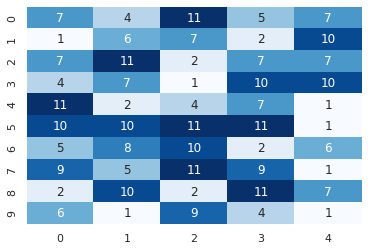

Number of rows:  10
Number of columns:  5
 
 --------------------------------------------------------------------
*Heuristic Game Mode 1*
-------------------------------------------------------------------- 

The path travelled is:  [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4)]


The cost of shortest path is:  57




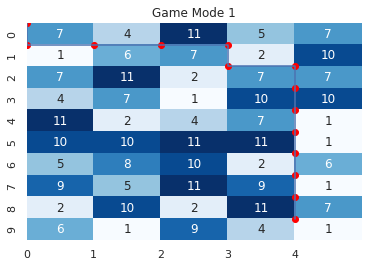


 --------------------------------------------------------------------
*Heuristic Game Mode 2*
-------------------------------------------------------------------- 

The path travelled is:  [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4)]


The cost of shortest path is:  60




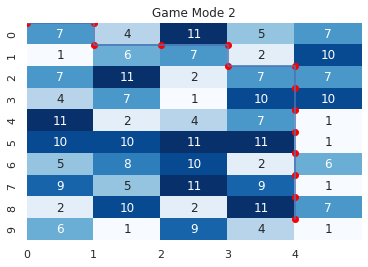

--------------------------------------------------------------------
*Dijkstra Game Mode 1*
-------------------------------------------------------------------- 

Height of grid= 10
Width of grid= 5




[[ 7.  4. 11.  5.  7.]
 [ 1.  6.  7.  2. 10.]
 [ 7. 11.  2.  7.  7.]
 [ 4.  7.  1. 10. 10.]
 [11.  2.  4.  7.  1.]
 [10. 10. 11. 11.  1.]
 [ 5.  8. 10.  2.  6.]
 [ 9.  5. 11.  9.  1.]
 [ 2. 10.  2. 11. nan]
 [ 6.  1.  9.  4. nan]]
[[ 7.  4. 11.  5.  7.]
 [ 1.  6.  7.  2. 10.]
 [ 7. 11.  2.  7.  7.]
 [ 4.  7.  1. 10. 10.]
 [11.  2.  4.  7.  1.]
 [10. 10. 11. 11.  1.]
 [ 5.  8. 10.  2.  6.]
 [ 9.  5. 11.  9. nan]
 [ 2. 10.  2. 11. nan]
 [ 6.  1.  9.  4. nan]]
[[ 7.  4. 11.  5.  7.]
 [ 1.  6.  7.  2. 10.]
 [ 7. 11.  2.  7.  7.]
 [ 4.  7.  1. 10. 10.]
 [11.  2.  4.  7.  1.]
 [10. 10. 11. 11.  1.]
 [ 5.  8. 10.  2. nan]
 [ 9.  5. 11.  9. nan]
 [ 2. 10.  2. 11. nan]
 [ 6.  1.  9.  4. nan]]
[[ 7.  4. 11.  5.  7.]
 [ 1.  6.  7.  2. 10.]
 [ 7. 11.  2.  7.  7.]
 [ 4.  7.  1. 10. 10.]
 [11.  2.  4

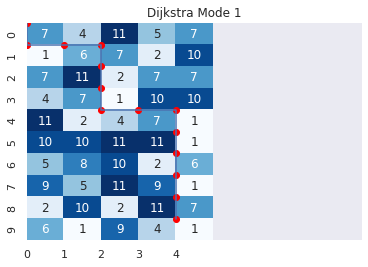

--------------------------------------------------------------------
*Dijkstra Game Mode 2*
-------------------------------------------------------------------- 

[[ 7.  4. 11.  5.  7.]
 [ 1.  6.  7.  2. 10.]
 [ 7. 11.  2.  7.  7.]
 [ 4.  7.  1. 10. 10.]
 [11.  2.  4.  7.  1.]
 [10. 10. 11. 11.  1.]
 [ 5.  8. 10.  2.  6.]
 [ 9.  5. 11.  9.  1.]
 [ 2. 10.  2. 11.  7.]
 [ 6.  1.  9. nan nan]]
[[ 7.  4. 11.  5.  7.]
 [ 1.  6.  7.  2. 10.]
 [ 7. 11.  2.  7.  7.]
 [ 4.  7.  1. 10. 10.]
 [11.  2.  4.  7.  1.]
 [10. 10. 11. 11.  1.]
 [ 5.  8. 10.  2.  6.]
 [ 9.  5. 11.  9.  1.]
 [ 2. 10.  2. nan  7.]
 [ 6.  1.  9. nan nan]]
[[ 7.  4. 11.  5.  7.]
 [ 1.  6.  7.  2. 10.]
 [ 7. 11.  2.  7.  7.]
 [ 4.  7.  1. 10. 10.]
 [11.  2.  4.  7.  1.]
 [10. 10. 11. 11.  1.]
 [ 5.  8. 10.  2.  6.]
 [ 9.  5. 11. nan  1.]
 [ 2. 10.  2. nan  7.]
 [ 6.  1.  9. nan nan]]
[[ 7.  4. 11.  5.  7.]
 [ 1.  6.  7.  2. 10.]
 [ 7. 11.  2.  7.  7.]
 [ 4.  7.  1. 10. 10.]
 [11.  2.  4.  7.  1.]
 [10. 10. 11. 11.  1.]
 [ 5. 

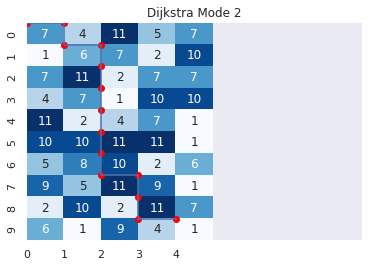

In [38]:
buildgrid = BuildGrid()
g = buildgrid.grid()
pg = buildgrid.showgrid(g)
roww = len(g)
coll = len(g[0])
print("Number of rows: ",roww)
print("Number of columns: ",coll)
print(" \n --------------------------------------------------------------------")
sp = buildgrid.shortpath(g)

dij = Dijkstra()
dij.dijmode1(g)
dij.dijmode2(g)

In [41]:
# with grid 1, the results came out to be

heu1 = []
heu2 = []
dij1 = []
dij2 = []
heu1.append('57')
heu2.append('60')
dij1.append('45')
dij2.append('38')
from tabulate import tabulate
print(tabulate([['Heuristic 1', '57'], ['Heuristic 2', '60'],['Dijkstra 1', '45'], ['Dijkstra 2', '38']], headers=['Model', 'Accuracy']))

Model          Accuracy
-----------  ----------
Heuristic 1          57
Heuristic 2          60
Dijkstra 1           45
Dijkstra 2           38


Grid: 
 [[ 1  3  7  5  4  7  8 10  2  3  3]
 [ 2  3  3  1  9  8  7 11  3  4  9]
 [ 1 11  6  9  2  7 11  9  6  1  2]
 [10  4  7 11  4 11  5  5  5 10  5]
 [ 8  1  6  4  5  3  6  5 10  1 10]
 [11 10  5  3 11  5  6  3  3  9  5]
 [11  8  9  8  2 11  7 11  6  2  7]
 [ 3  6  6  4 11  8  3  4 10  1 10]
 [ 7  8  7 10  4  9 10 10 10  8 11]]


Visualizing the Grid:




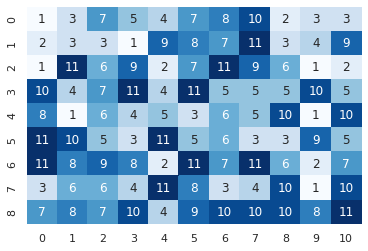

Number of rows:  9
Number of columns:  11
 
 --------------------------------------------------------------------
*Heuristic Game Mode 1*
-------------------------------------------------------------------- 

The path travelled is:  [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (4, 2), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (6, 6), (7, 6), (7, 7), (7, 8), (7, 9), (8, 9), (8, 10)]


The cost of shortest path is:  96




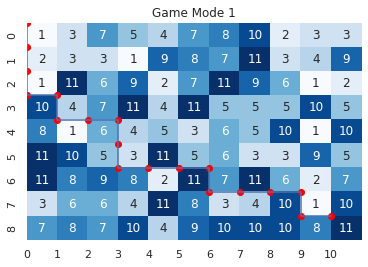


 --------------------------------------------------------------------
*Heuristic Game Mode 2*
-------------------------------------------------------------------- 

The path travelled is:  [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (3, 8), (3, 9), (3, 10), (4, 10), (5, 10), (6, 10), (7, 10), (8, 10)]


The cost of shortest path is:  122




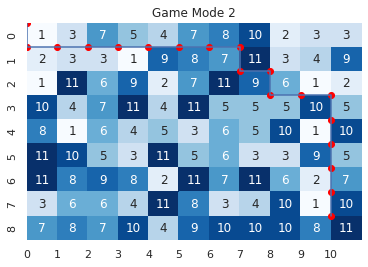

--------------------------------------------------------------------
*Dijkstra Game Mode 1*
-------------------------------------------------------------------- 

Height of grid= 9
Width of grid= 11




[[ 1.  3.  7.  5.  4.  7.  8. 10.  2.  3.  3.]
 [ 2.  3.  3.  1.  9.  8.  7. 11.  3.  4.  9.]
 [ 1. 11.  6.  9.  2.  7. 11.  9.  6.  1.  2.]
 [10.  4.  7. 11.  4. 11.  5.  5.  5. 10.  5.]
 [ 8.  1.  6.  4.  5.  3.  6.  5. 10.  1. 10.]
 [11. 10.  5.  3. 11.  5.  6.  3.  3.  9.  5.]
 [11.  8.  9.  8.  2. 11.  7. 11.  6.  2.  7.]
 [ 3.  6.  6.  4. 11.  8.  3.  4. 10.  1. 10.]
 [ 7.  8.  7. 10.  4.  9. 10. 10. 10. nan nan]]
[[ 1.  3.  7.  5.  4.  7.  8. 10.  2.  3.  3.]
 [ 2.  3.  3.  1.  9.  8.  7. 11.  3.  4.  9.]
 [ 1. 11.  6.  9.  2.  7. 11.  9.  6.  1.  2.]
 [10.  4.  7. 11.  4. 11.  5.  5.  5. 10.  5.]
 [ 8.  1.  6.  4.  5.  3.  6.  5. 10.  1. 10.]
 [11. 10.  5.  3. 11.  5.  6.  3.  3.  9.  5.]
 [11.  8.  9.  8.  2. 11.  7. 11.  6.  2.  7.]
 [ 3.  6.  6.  4. 11.  8.  3.  4. 10. nan 10

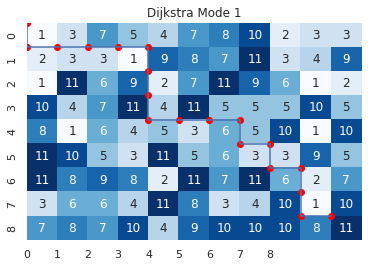

--------------------------------------------------------------------
*Dijkstra Game Mode 2*
-------------------------------------------------------------------- 

[[ 1.  3.  7.  5.  4.  7.  8. 10.  2.  3.  3.]
 [ 2.  3.  3.  1.  9.  8.  7. 11.  3.  4.  9.]
 [ 1. 11.  6.  9.  2.  7. 11.  9.  6.  1.  2.]
 [10.  4.  7. 11.  4. 11.  5.  5.  5. 10.  5.]
 [ 8.  1.  6.  4.  5.  3.  6.  5. 10.  1. 10.]
 [11. 10.  5.  3. 11.  5.  6.  3.  3.  9.  5.]
 [11.  8.  9.  8.  2. 11.  7. 11.  6.  2.  7.]
 [ 3.  6.  6.  4. 11.  8.  3.  4. 10.  1. 10.]
 [ 7.  8.  7. 10.  4.  9. 10. 10. 10. nan nan]]
[[ 1.  3.  7.  5.  4.  7.  8. 10.  2.  3.  3.]
 [ 2.  3.  3.  1.  9.  8.  7. 11.  3.  4.  9.]
 [ 1. 11.  6.  9.  2.  7. 11.  9.  6.  1.  2.]
 [10.  4.  7. 11.  4. 11.  5.  5.  5. 10.  5.]
 [ 8.  1.  6.  4.  5.  3.  6.  5. 10.  1. 10.]
 [11. 10.  5.  3. 11.  5.  6.  3.  3.  9.  5.]
 [11.  8.  9.  8.  2. 11.  7. 11.  6.  2.  7.]
 [ 3.  6.  6.  4. 11.  8.  3.  4. 10.  1. 10.]
 [ 7.  8.  7. 10.  4.  9. 10. 10. nan

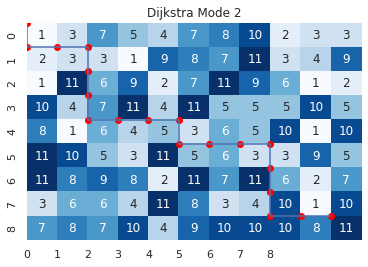

In [42]:
buildgrid = BuildGrid()
g = buildgrid.grid()
pg = buildgrid.showgrid(g)
roww = len(g)
coll = len(g[0])
print("Number of rows: ",roww)
print("Number of columns: ",coll)
print(" \n --------------------------------------------------------------------")
sp = buildgrid.shortpath(g)

dij = Dijkstra()
dij.dijmode1(g)
dij.dijmode2(g)

In [43]:
# with grid 2, the results came out to be

heu1.append('96')
heu2.append('122')
dij1.append('77')
dij2.append('30')
from tabulate import tabulate
print(tabulate([['Heuristic 1', '96'], ['Heuristic 2', '122'],['Dijkstra 1', '77'], ['Dijkstra 2', '30']], headers=['Model', 'Accuracy']))

Model          Accuracy
-----------  ----------
Heuristic 1          96
Heuristic 2         122
Dijkstra 1           77
Dijkstra 2           30


Grid: 
 [[ 1  7  3 11  2  8  3  3  8  3  7]
 [ 2  3  3  8 10  2  3  4  3  8  8]
 [ 6  7  2  5  7  3  3  6  4  9  5]
 [ 6  2  8  6  2  3  9  8  5  7  2]
 [ 7  6  8  3  9  9 11 11  2  8  2]
 [ 8 11  7  6  9  6  2  5 10  1  4]]


Visualizing the Grid:




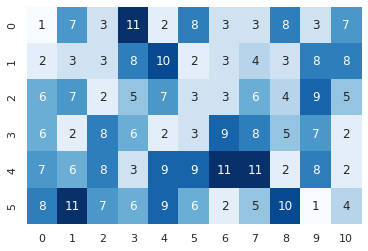

Number of rows:  6
Number of columns:  11
 
 --------------------------------------------------------------------
*Heuristic Game Mode 1*
-------------------------------------------------------------------- 

The path travelled is:  [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 8), (4, 9), (5, 9), (5, 10)]


The cost of shortest path is:  63




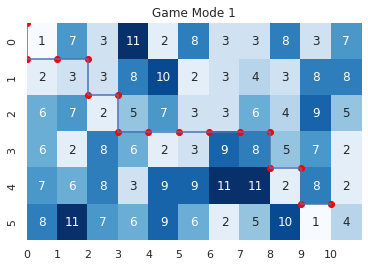


 --------------------------------------------------------------------
*Heuristic Game Mode 2*
-------------------------------------------------------------------- 

The path travelled is:  [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10)]


The cost of shortest path is:  67




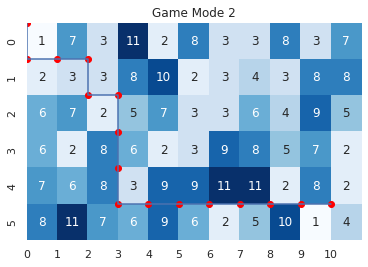

--------------------------------------------------------------------
*Dijkstra Game Mode 1*
-------------------------------------------------------------------- 

Height of grid= 6
Width of grid= 11




[[ 1.  7.  3. 11.  2.  8.  3.  3.  8.  3.  7.]
 [ 2.  3.  3.  8. 10.  2.  3.  4.  3.  8.  8.]
 [ 6.  7.  2.  5.  7.  3.  3.  6.  4.  9.  5.]
 [ 6.  2.  8.  6.  2.  3.  9.  8.  5.  7.  2.]
 [ 7.  6.  8.  3.  9.  9. 11. 11.  2.  8. nan]
 [ 8. 11.  7.  6.  9.  6.  2.  5. 10.  1. nan]]
[[ 1.  7.  3. 11.  2.  8.  3.  3.  8.  3.  7.]
 [ 2.  3.  3.  8. 10.  2.  3.  4.  3.  8.  8.]
 [ 6.  7.  2.  5.  7.  3.  3.  6.  4.  9.  5.]
 [ 6.  2.  8.  6.  2.  3.  9.  8.  5.  7. nan]
 [ 7.  6.  8.  3.  9.  9. 11. 11.  2.  8. nan]
 [ 8. 11.  7.  6.  9.  6.  2.  5. 10.  1. nan]]
[[ 1.  7.  3. 11.  2.  8.  3.  3.  8.  3.  7.]
 [ 2.  3.  3.  8. 10.  2.  3.  4.  3.  8.  8.]
 [ 6.  7.  2.  5.  7.  3.  3.  6.  4.  9.  5.]
 [ 6.  2.  8.  6.  2.  3.  9.  8.  5. nan nan]
 [ 7.  6.  8.  3.  9.  9. 11. 11.  2.  8. n

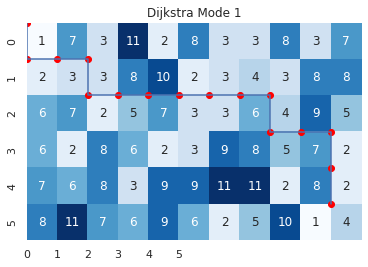

--------------------------------------------------------------------
*Dijkstra Game Mode 2*
-------------------------------------------------------------------- 

[[ 1.  7.  3. 11.  2.  8.  3.  3.  8.  3.  7.]
 [ 2.  3.  3.  8. 10.  2.  3.  4.  3.  8.  8.]
 [ 6.  7.  2.  5.  7.  3.  3.  6.  4.  9.  5.]
 [ 6.  2.  8.  6.  2.  3.  9.  8.  5.  7.  2.]
 [ 7.  6.  8.  3.  9.  9. 11. 11.  2.  8. nan]
 [ 8. 11.  7.  6.  9.  6.  2.  5. 10.  1. nan]]
[[ 1.  7.  3. 11.  2.  8.  3.  3.  8.  3.  7.]
 [ 2.  3.  3.  8. 10.  2.  3.  4.  3.  8.  8.]
 [ 6.  7.  2.  5.  7.  3.  3.  6.  4.  9.  5.]
 [ 6.  2.  8.  6.  2.  3.  9.  8.  5.  7.  2.]
 [ 7.  6.  8.  3.  9.  9. 11. 11.  2. nan nan]
 [ 8. 11.  7.  6.  9.  6.  2.  5. 10.  1. nan]]
[[ 1.  7.  3. 11.  2.  8.  3.  3.  8.  3.  7.]
 [ 2.  3.  3.  8. 10.  2.  3.  4.  3.  8.  8.]
 [ 6.  7.  2.  5.  7.  3.  3.  6.  4.  9.  5.]
 [ 6.  2.  8.  6.  2.  3.  9.  8.  5. nan  2.]
 [ 7.  6.  8.  3.  9.  9. 11. 11.  2. nan nan]
 [ 8. 11.  7.  6.  9.  6.  2.  5. 10

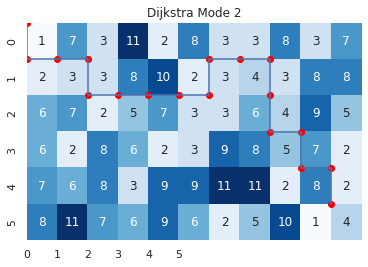

In [45]:
buildgrid = BuildGrid()
g = buildgrid.grid()
pg = buildgrid.showgrid(g)
roww = len(g)
coll = len(g[0])
print("Number of rows: ",roww)
print("Number of columns: ",coll)
print(" \n --------------------------------------------------------------------")
sp = buildgrid.shortpath(g)

dij = Dijkstra()
dij.dijmode1(g)
dij.dijmode2(g)

In [46]:
# with grid 2, the results came out to be

heu1.append('63')
heu2.append('67')
dij1.append('58')
dij2.append('27')
from tabulate import tabulate
print(tabulate([['Heuristic 1', '63'], ['Heuristic 2', '67'],['Dijkstra 1', '58'], ['Dijkstra 2', '27']], headers=['Model', 'Accuracy']))

Model          Accuracy
-----------  ----------
Heuristic 1          63
Heuristic 2          67
Dijkstra 1           58
Dijkstra 2           27


Grid: 
 [[ 4  7  3  9  5  1 10  2  8]
 [ 8  5 11  4  4  3  1  8  4]
 [ 8  5 11  5  9  1  7  2  1]
 [ 2  7 11  3 11  3 10 11  8]
 [ 1  8  4 11  9  7  6  2  9]
 [ 4  6 11  2  1 10  1  2  6]
 [ 6  5  5  1  1 11  2 11  1]
 [ 5  1  7  6  1  7  4 10  2]
 [ 3 10  4  8  9  4 11  4  9]]


Visualizing the Grid:




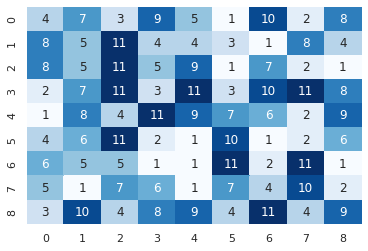

Number of rows:  9
Number of columns:  9
 
 --------------------------------------------------------------------
*Heuristic Game Mode 1*
-------------------------------------------------------------------- 

The path travelled is:  [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (2, 7), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)]


The cost of shortest path is:  76




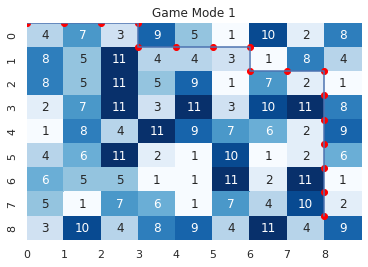


 --------------------------------------------------------------------
*Heuristic Game Mode 2*
-------------------------------------------------------------------- 

The path travelled is:  [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (7, 2), (7, 3), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]


The cost of shortest path is:  106




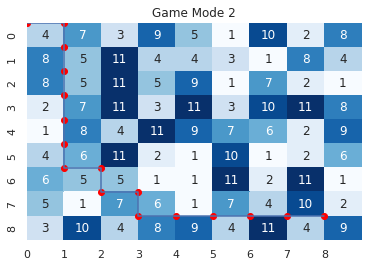

--------------------------------------------------------------------
*Dijkstra Game Mode 1*
-------------------------------------------------------------------- 

Height of grid= 9
Width of grid= 9




[[ 4.  7.  3.  9.  5.  1. 10.  2.  8.]
 [ 8.  5. 11.  4.  4.  3.  1.  8.  4.]
 [ 8.  5. 11.  5.  9.  1.  7.  2.  1.]
 [ 2.  7. 11.  3. 11.  3. 10. 11.  8.]
 [ 1.  8.  4. 11.  9.  7.  6.  2.  9.]
 [ 4.  6. 11.  2.  1. 10.  1.  2.  6.]
 [ 6.  5.  5.  1.  1. 11.  2. 11.  1.]
 [ 5.  1.  7.  6.  1.  7.  4. 10. nan]
 [ 3. 10.  4.  8.  9.  4. 11.  4. nan]]
[[ 4.  7.  3.  9.  5.  1. 10.  2.  8.]
 [ 8.  5. 11.  4.  4.  3.  1.  8.  4.]
 [ 8.  5. 11.  5.  9.  1.  7.  2.  1.]
 [ 2.  7. 11.  3. 11.  3. 10. 11.  8.]
 [ 1.  8.  4. 11.  9.  7.  6.  2.  9.]
 [ 4.  6. 11.  2.  1. 10.  1.  2.  6.]
 [ 6.  5.  5.  1.  1. 11.  2. 11. nan]
 [ 5.  1.  7.  6.  1.  7.  4. 10. nan]
 [ 3. 10.  4.  8.  9.  4. 11.  4. nan]]
[[ 4.  7.  3.  9.  5.  1. 10.  2.  8.]
 [ 8.  5. 11.  4.  4.  3.  1.  8.  4.]
 [ 8.  5. 11.  5

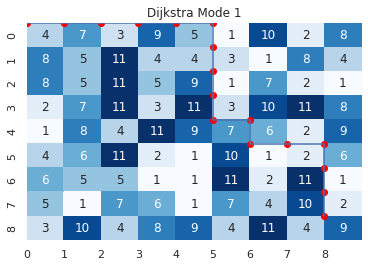

--------------------------------------------------------------------
*Dijkstra Game Mode 2*
-------------------------------------------------------------------- 

[[ 4.  7.  3.  9.  5.  1. 10.  2.  8.]
 [ 8.  5. 11.  4.  4.  3.  1.  8.  4.]
 [ 8.  5. 11.  5.  9.  1.  7.  2.  1.]
 [ 2.  7. 11.  3. 11.  3. 10. 11.  8.]
 [ 1.  8.  4. 11.  9.  7.  6.  2.  9.]
 [ 4.  6. 11.  2.  1. 10.  1.  2.  6.]
 [ 6.  5.  5.  1.  1. 11.  2. 11.  1.]
 [ 5.  1.  7.  6.  1.  7.  4. 10. nan]
 [ 3. 10.  4.  8.  9.  4. 11.  4. nan]]
[[ 4.  7.  3.  9.  5.  1. 10.  2.  8.]
 [ 8.  5. 11.  4.  4.  3.  1.  8.  4.]
 [ 8.  5. 11.  5.  9.  1.  7.  2.  1.]
 [ 2.  7. 11.  3. 11.  3. 10. 11.  8.]
 [ 1.  8.  4. 11.  9.  7.  6.  2.  9.]
 [ 4.  6. 11.  2.  1. 10.  1.  2.  6.]
 [ 6.  5.  5.  1.  1. 11.  2. 11.  1.]
 [ 5.  1.  7.  6.  1.  7.  4. nan nan]
 [ 3. 10.  4.  8.  9.  4. 11.  4. nan]]
[[ 4.  7.  3.  9.  5.  1. 10.  2.  8.]
 [ 8.  5. 11.  4.  4.  3.  1.  8.  4.]
 [ 8.  5. 11.  5.  9.  1.  7.  2.  1.]
 [ 2.  7. 11.  3

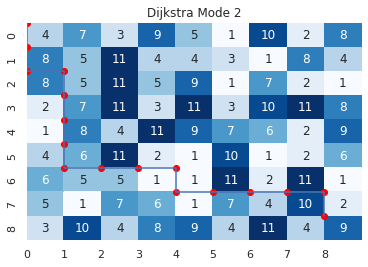

In [47]:
buildgrid = BuildGrid()
g = buildgrid.grid()
pg = buildgrid.showgrid(g)
roww = len(g)
coll = len(g[0])
print("Number of rows: ",roww)
print("Number of columns: ",coll)
print(" \n --------------------------------------------------------------------")
sp = buildgrid.shortpath(g)

dij = Dijkstra()
dij.dijmode1(g)
dij.dijmode2(g)

In [48]:
# with grid 3, the results came out to be

heu1.append('76')
heu2.append('106')
dij1.append('66')
dij2.append('47')
from tabulate import tabulate
print(tabulate([['Heuristic 1', '76'], ['Heuristic 2', '106'],['Dijkstra 1', '66'], ['Dijkstra 2', '47']], headers=['Model', 'Accuracy']))

Model          Accuracy
-----------  ----------
Heuristic 1          76
Heuristic 2         106
Dijkstra 1           66
Dijkstra 2           47


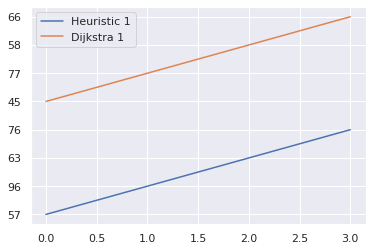

In [56]:
#Comparing Heuristic 1 with Dijkstra 1 for 3 different Grids
plt.plot(heu1,label='Heuristic 1')
plt.plot(dij1, label='Dijkstra 1')
plt.legend()

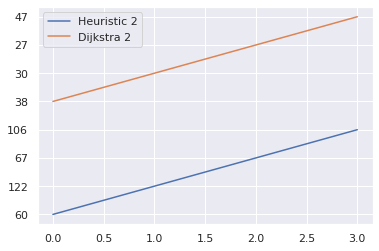

In [57]:
#Comparing Heuristic 2 with Dijkstra 2 for 3 different Grids
plt.plot(heu2,label='Heuristic 2')
plt.plot(dij2, label='Dijkstra 2')
plt.legend()